## E3 Fundamentals of Visualization libraries Part 1_Matplotlib

In [2]:
# Import Libraries
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime as dt

import matplotlib
matplotlib.__version__


'3.7.1'

In [3]:
# Define the file path
file_path = r"C:\Users\north\OneDrive\Dokumente\Career Foundry\Data Visualization 2\Citi-Bike_Bike-Sharing\Data\merged_citibike_weather.csv"


In [4]:
data = pd.read_csv(file_path, low_memory=False)

In [9]:
# Print column names for reference
print(data.columns[5], data.columns[7])

# Display the first few rows of these columns
print(data.iloc[:, [5, 7]].head())

# Check unique types in each column
print(data.iloc[:, 5].apply(type).unique())
print(data.iloc[:, 7].apply(type).unique())


start_station_id end_station_id
  start_station_id end_station_id
0          7650.05        7685.14
1          4028.04        4488.09
2          6753.08        6248.06
3          7338.02        6248.06
4          6364.10        6248.06
[<class 'str'> <class 'float'>]
[<class 'str'> <class 'float'>]


In [11]:
# Convert all values to str to ensure uniformity
data['start_station_id'] = data['start_station_id'].astype(str)
data['end_station_id'] = data['end_station_id'].astype(str)


In [13]:
data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_date,start_time,end_date,end_time,date,avg_temp,_merge
0,BFD29218AB271154,electric_bike,2022-01-21 13:13:43.392,2022-01-21 13:22:31.463,West End Ave & W 107 St,7650.05,Mt Morris Park W & W 120 St,7685.14,40.802117,-73.968181,40.804038,-73.945925,member,2022-01-21,13:13:43.392000,2022-01-21,13:22:31.463000,2022-01-21,-6.0,both
1,7C953F2FD7BE1302,classic_bike,2022-01-10 11:30:54.162,2022-01-10 11:41:43.422,4 Ave & 3 St,4028.04,Boerum Pl\t& Pacific St,4488.09,40.673746,-73.985649,40.688489,-73.991160,member,2022-01-10,11:30:54.162000,2022-01-10,11:41:43.422000,2022-01-10,1.6,both
2,95893ABD40CED4B8,electric_bike,2022-01-26 10:52:43.096,2022-01-26 11:06:35.227,1 Ave & E 62 St,6753.08,5 Ave & E 29 St,6248.06,40.761227,-73.960940,40.745168,-73.986831,member,2022-01-26,10:52:43.096000,2022-01-26,11:06:35.227000,2022-01-26,-2.3,both
3,F853B50772137378,classic_bike,2022-01-03 08:35:48.247,2022-01-03 09:10:50.475,2 Ave & E 96 St,7338.02,5 Ave & E 29 St,6248.06,40.783964,-73.947167,40.745168,-73.986831,member,2022-01-03,08:35:48.247000,2022-01-03,09:10:50.475000,2022-01-03,1.4,both
4,7590ADF834797B4B,classic_bike,2022-01-22 14:14:23.043,2022-01-22 14:34:57.474,6 Ave & W 34 St,6364.10,5 Ave & E 29 St,6248.06,40.749640,-73.988050,40.745168,-73.986831,member,2022-01-22,14:14:23.043000,2022-01-22,14:34:57.474000,2022-01-22,-5.9,both


In [18]:
data.shape

(29838806, 20)

In [21]:
data.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
start_date             object
start_time             object
end_date               object
end_time               object
date                   object
avg_temp              float64
_merge                 object
dtype: object

In [28]:
data['date'] = pd.to_datetime(data['date'])

In [30]:
data.dtypes

ride_id                       object
rideable_type                 object
started_at                    object
ended_at                      object
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
start_date                    object
start_time                    object
end_date                      object
end_time                      object
date                  datetime64[ns]
avg_temp                     float64
_merge                        object
dtype: object

### Basic plotting with pandas

In [36]:
data = data.set_index('date')

In [44]:
data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_date,start_time,end_date,end_time,avg_temp,_merge
date,,,,,,,,,,,,,,,,,,,
2022-01-21,BFD29218AB271154,electric_bike,2022-01-21 13:13:43.392,2022-01-21 13:22:31.463,West End Ave & W 107 St,7650.05,Mt Morris Park W & W 120 St,7685.14,40.802117,-73.968181,40.804038,-73.945925,member,2022-01-21,13:13:43.392000,2022-01-21,13:22:31.463000,-6.0,both
2022-01-10,7C953F2FD7BE1302,classic_bike,2022-01-10 11:30:54.162,2022-01-10 11:41:43.422,4 Ave & 3 St,4028.04,Boerum Pl\t& Pacific St,4488.09,40.673746,-73.985649,40.688489,-73.991160,member,2022-01-10,11:30:54.162000,2022-01-10,11:41:43.422000,1.6,both
2022-01-26,95893ABD40CED4B8,electric_bike,2022-01-26 10:52:43.096,2022-01-26 11:06:35.227,1 Ave & E 62 St,6753.08,5 Ave & E 29 St,6248.06,40.761227,-73.960940,40.745168,-73.986831,member,2022-01-26,10:52:43.096000,2022-01-26,11:06:35.227000,-2.3,both
2022-01-03,F853B50772137378,classic_bike,2022-01-03 08:35:48.247,2022-01-03 09:10:50.475,2 Ave & E 96 St,7338.02,5 Ave & E 29 St,6248.06,40.783964,-73.947167,40.745168,-73.986831,member,2022-01-03,08:35:48.247000,2022-01-03,09:10:50.475000,1.4,both
2022-01-22,7590ADF834797B4B,classic_bike,2022-01-22 14:14:23.043,2022-01-22 14:34:57.474,6 Ave & W 34 St,6364.10,5 Ave & E 29 St,6248.06,40.749640,-73.988050,40.745168,-73.986831,member,2022-01-22,14:14:23.043000,2022-01-22,14:34:57.474000,-5.9,both


#### Line plot of the temperatures for 2022 plotted as time series

In [54]:
# Define the file path for df_temps.csv
file_path = r"C:\Users\north\OneDrive\Dokumente\Career Foundry\Data Visualization 2\Citi-Bike_Bike-Sharing\Data\df_temps.csv"

# Load the data into a DataFrame
df_temps = pd.read_csv(file_path)


In [62]:
df_temps.head()

,avg_temp
date,
2022-01-01,11.6
2022-01-02,11.4
2022-01-03,1.4
2022-01-04,-2.7
2022-01-05,3.2


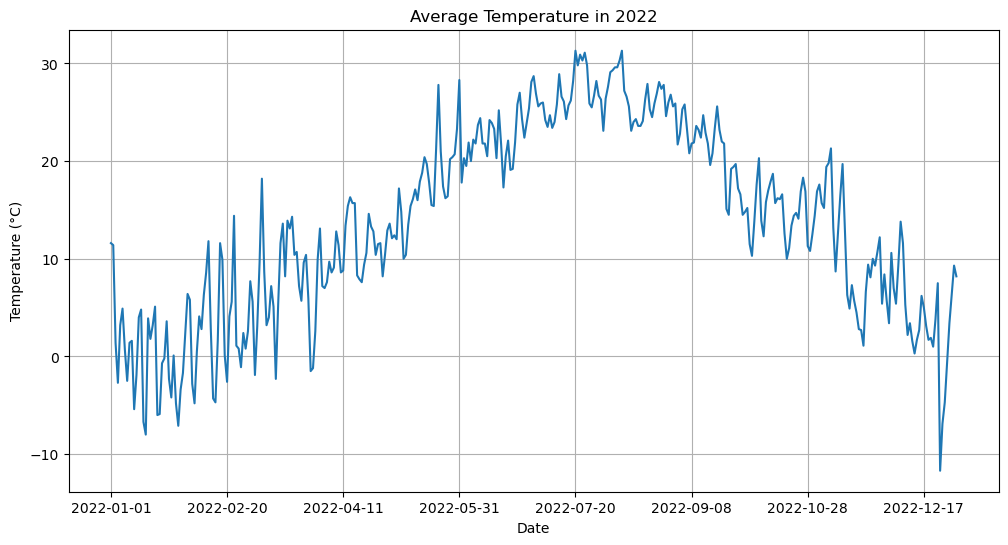

In [64]:
# Plot the temperatures as a time series
plt.figure(figsize=(12, 6))
df_temps['avg_temp'].plot(title="Average Temperature in 2022", xlabel="Date", ylabel="Temperature (°C)")

# Add grid and save the plot
plt.grid(True)
plt.savefig("average_temperature_2022.png", dpi=300)
plt.show()

### Aggregate trips 

In [73]:
data.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'start_date', 'start_time', 'end_date', 'end_time',
       'avg_temp', '_merge'],
      dtype='object')

In [151]:
# Group by 'date' and count unique 'ride_id'
trip_counts = data.groupby('date')['ride_id'].count().reset_index(name='trip_count')

In [153]:
# Ensure 'date' in trip_counts is a datetime object
trip_counts['date'] = pd.to_datetime(trip_counts['date'])

In [155]:
trip_counts.dtypes

date          datetime64[ns]
trip_count             int64
dtype: object

In [157]:
trip_counts.set_index('date', inplace=True)

In [193]:
trip_counts.head()

,trip_count
date,
2021-01-30,1
2021-02-15,1
2021-03-11,1
2021-03-14,1
2021-03-31,1


In [169]:
df_temps.dtypes

date         object
avg_temp    float64
dtype: object

In [171]:
# Ensure 'date' in df_temps is a datetime object
df_temps['date'] = pd.to_datetime(df_temps['date'])

In [173]:
df_temps.set_index('date', inplace=True)

In [187]:
df_merged = pd.merge(
    df_temps, 
    trip_counts, 
    left_index=True,  # Use the index of df_temps
    right_on='date',  # Use the 'date' column in trip_counts
    how='left'
)
# Fill any missing trip counts with 0 and convert to integer
df_merged['trip_count'] = df_merged['trip_count'].fillna(0).astype(int)

# Display the first few rows of the merged DataFrame
df_merged.head()


,avg_temp,trip_count
date,,
2022-01-01,11.6,20428
2022-01-02,11.4,43009
2022-01-03,1.4,33189
2022-01-04,-2.7,36842
2022-01-05,3.2,34230


In [200]:
# Define the file path to save the CSV
output_file_path = r"C:\Users\north\OneDrive\Dokumente\Career Foundry\Data Visualization 2\Citi-Bike_Bike-Sharing\Data\merged_weather_trips.csv"

# Save the merged DataFrame to the specified path
df_merged.to_csv(output_file_path)

print(f"Data successfully saved to {output_file_path}")


Data successfully saved to C:\Users\north\OneDrive\Dokumente\Career Foundry\Data Visualization 2\Citi-Bike_Bike-Sharing\Data\merged_weather_trips.csv


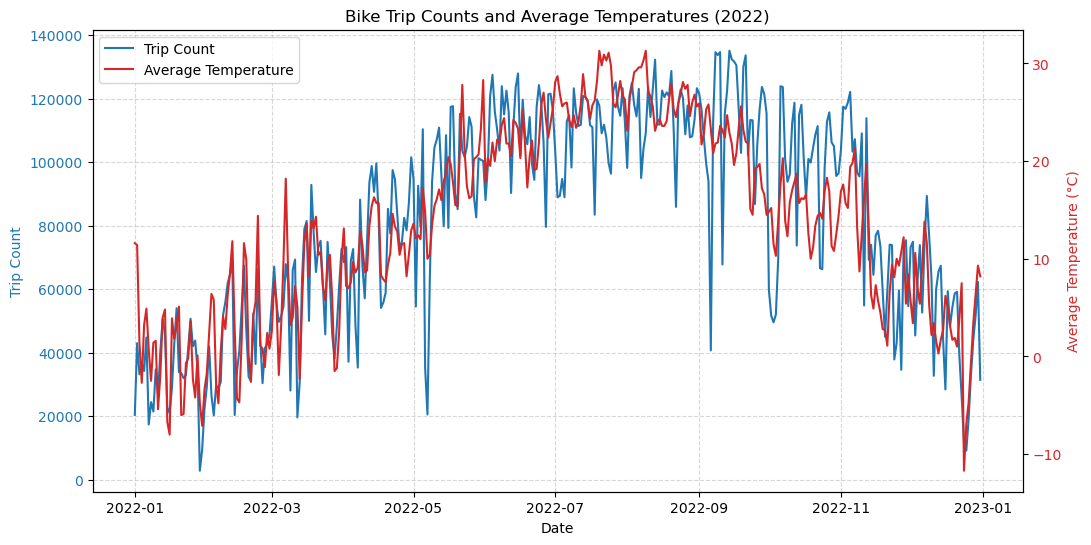

In [195]:
# Ensure the data is sorted by date for proper time series plotting
df_merged = df_merged.sort_index()

# Create the figure and axis objects
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the trip counts on the first y-axis
ax1.plot(df_merged.index, df_merged['trip_count'], color='tab:blue', label='Trip Count')
ax1.set_xlabel('Date')
ax1.set_ylabel('Trip Count', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a twin y-axis to plot temperatures
ax2 = ax1.twinx()
ax2.plot(df_merged.index, df_merged['avg_temp'], color='tab:red', label='Average Temperature')
ax2.set_ylabel('Average Temperature (°C)', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Add a title and grid
plt.title('Bike Trip Counts and Average Temperatures (2022)')
ax1.grid(True, linestyle='--', alpha=0.5)

# Add a legend
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
plt.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

# Save the plot to a file
plt.savefig("bike_trips_and_temperatures.png", dpi=300)

# Show the plot
plt.show()


#### Data Preparation:
- The data was sorted by date to ensure proper time series plotting.
- The `df_merged` dataframe contains two key metrics: 
  - `trip_count` (number of bike trips per day)
  - `avg_temp` (average temperature per day).

#### Matplotlib Paradigm:
- The **Object-Oriented API** was used, which involves creating `Figure` and `Axes` objects explicitly.
- This approach provides more control over the layout and customization of the plot.

#### Primary Axis (Trip Count):
- The primary y-axis (`ax1`) was used to plot the number of bike trips.
- The `plot()` function was called on `ax1` to draw the trip counts in blue.
- The y-axis label and tick colors were customized to match the blue line.

#### Secondary Axis (Temperature):
- A twin y-axis (`ax2`) was created using `twinx()` to overlay another y-axis on the same plot.
- The `plot()` function was used on `ax2` to draw the average temperatures in red.
- The y-axis label and tick colors were customized to match the red line.

#### Title, Grid, and Legends:
- A title was added to describe the chart's purpose.
- A grid was added to improve readability.
- Legends from both axes were combined to display labels for both data series (`trip_count` and `avg_temp`).

#### Saving the Plot:
- The plot was saved as a PNG file with `savefig()` for easy reuse.
